- precompute small inputs
- diff p per layer
- TTA
- 2x2 avg pool vs concat pool vs none
- remove last block
- Save resized inputs

## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

In [3]:
from sklearn.metrics import fbeta_score

In [4]:
thresh=0.2

In [5]:
def f2(preds, targs):
    return fbeta_score(targs, (preds>thresh), 2, average='samples')

In [6]:
bs=64; sz=64; metrics=[accuracy_thresh(thresh), f2]
f_model = resnet34
path = "/data/jhoward/fast/planet/"

In [7]:
augs = [RandomRotate(10), RandomDihedral(), RandomLighting(0.05, 0.05)]
#augs=[]

## Train

In [8]:
n=len(list(open(f'{path}train_v2.csv')))-1
val_pct=0.2
np.random.seed(42)
val_idxs=np.random.permutation(n)[:int(val_pct*n)]

In [9]:
tfms = ClassifierData.tfms_from_model(f_model, sz, aug_tfms=augs)#, max_zoom=1.1)
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [10]:
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [10]:
models = ConvnetBuilder(resnet34, ds.c, ds.is_multi, ps=0.2, xtra_fc=[512])

In [11]:
learn = Learner(ds, models, opt_fn=SGD_Momentum(0.9), metrics=metrics)

-- freeze 9999


In [21]:
lrf=learn.lr_find(True)

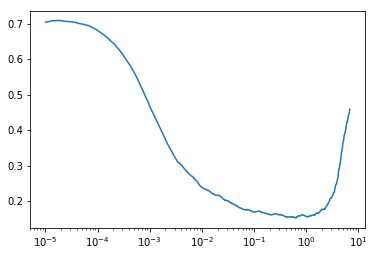

In [22]:
lrf.plot()

In [15]:
learn.fit_fc(1, 0.1)

[0.17202516883161428, 0.15205792, 0.90713573, 0.85491914]



In [14]:
learn.fit(1, 0.1, cycle_len=1)

[0.13446472242680566, 0.12981315, 0.92254996, 0.88104206]



In [13]:
learn.freeze_to(-3)

-- freeze -3


In [14]:
learn.fit(1, 0.1, cycle_len=1)

[0.12278300733101899, 0.11344025, 0.93599296, 0.89931405]



In [15]:
learn.freeze_to(-4)

-- freeze -4


In [16]:
learn.fit(1, 0.1, cycle_len=1)

[0.10589762005217737, 0.10391235, 0.94138461, 0.90701365]



In [17]:
learn.freeze_to(-5)

-- freeze -5


In [18]:
learn.fit(2, 0.1, cycle_len=2)

[0.1057417424929581, 0.10346823, 0.94284129, 0.90692466]


[0.10263258621108856, 0.096401758, 0.94756013, 0.91562659]



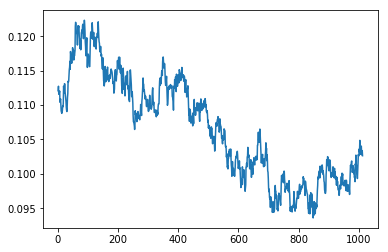

In [19]:
learn.sched.plot_loss()

In [20]:
learn.unfreeze()

-- freeze 0


In [31]:
lrf=learn.lr_find()

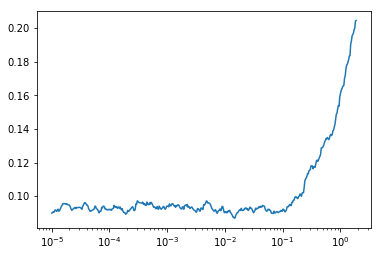

In [32]:
lrf.plot()

In [21]:
learn.fit(6, 1e-1, cycle_len=3)

[0.10684182449431591, 0.10739772, 0.93667275, 0.90421528]


[0.09863774716215301, 0.096818335, 0.94642347, 0.91371632]


[0.09508354878744239, 0.093337953, 0.94868869, 0.91822559]


[0.10421315490951084, 0.10525654, 0.94027138, 0.90485865]


[0.09885474759235834, 0.096053496, 0.94925857, 0.91446584]


[0.08638281271207247, 0.092257954, 0.94986147, 0.91820657]



sz=256

In [21]:
learn.fit(6, 1e-1, cycle_len=3)

[0.09501643619678657, 0.096676454, 0.952797, 0.92021149]


[0.08325407286886795, 0.086923286, 0.95781654, 0.92510694]


[0.0772113978873356, 0.083646968, 0.95684612, 0.92844057]


[0.09248117026094071, 0.096504554, 0.9516331, 0.91782409]


[0.08058513656811268, 0.083840311, 0.9562366, 0.92812061]


[0.08431754927611347, 0.0825646, 0.95814192, 0.93009514]


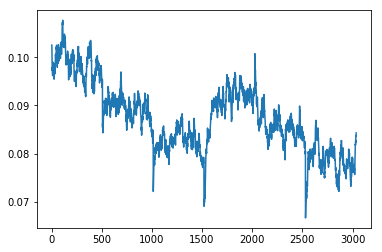

In [22]:
learn.sched.plot_loss()

In [ ]:
tfms = ClassifierData.tfms_from_model(f_model, 128, aug_tfms=augs)#, max_zoom=1.1)
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [ ]:
learn.data = ds
learn.get_activations(sz)

### Import data

In [15]:
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, [1,2,3], (None,None),
               suffix='.jpg')

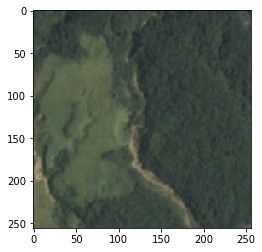

In [21]:
x,y=next(iter(ds.val_dl))
im=x[0].numpy()
plt.imshow(im)

## End

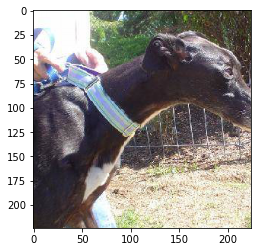

In [20]:
tfm=image_gen(noop, 224, 1.1)
ds = ClassifierData.from_paths("/data/jhoward/fast/dogscats/", 2, [tfm, tfm], num_workers=0)
x,y=next(iter(ds.val_dl))
plt.imshow(np.rollaxis(x[0].numpy(),0,3));

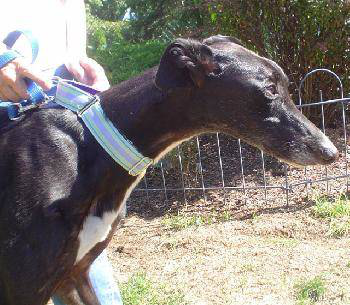

In [18]:
PIL.Image.open(ds.val_dl.dataset.fnames[0])